In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [2]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

# MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0504_norm.csv')
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_feature_0507.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,0.030,0.017,0.005,0.004,0.012,0.001,0.103,0.005,0.014,0.008,0.001,0.031,0.002,0.001,0.028,0.005,0.017,0.008,0.001,0.046,NaN,0.000,NaN,0.003,0.020,0.014,0.005,0.031,0.005,0.001,0.006,0.005,0.060,0.021,0.003,0.026,0.002,0.000,0.002,0.017
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,0.031,0.018,0.005,0.004,0.012,0.001,0.107,0.004,0.014,0.009,0.002,0.031,0.002,0.001,0.028,0.005,0.019,0.009,0.001,0.046,NaN,0.000,NaN,0.003,0.020,0.015,0.005,0.033,0.006,0.001,0.006,0.005,0.060,0.023,0.003,0.027,0.002,0.000,0.002,0.016
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.005,0.001,0.001,0.001,0.001,0.001,0.002,0.000,0.013,0.005,0.002,0.002,0.003,0.000,0.015,0.001,0.002,0.002,0.003,0.002,NaN,0.000,NaN,0.001,0.034,0.002,0.002,0.003,0.011,0.000,0.002,0.001,0.112,0.004,0.001,0.010,0.002,0.000,0.000,0.001
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.006,0.001,0.001,0.001,0.002,0.001,0.002,0.000,0.014,0.007,0.003,0.002,0.004,0.000,0.013,0.001,0.002,0.003,0.005,0.002,NaN,0.000,NaN,0.001,0.033,0.003,0.002,0.004,0.013,0.000,0.002,0.001,0.115,0.006,0.001,0.012,0.002,0.000,0.000,0.001
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.001,NaN,0.000,NaN,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.003,0.000,0.002,0.000,0.000,0.005,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,0.154,0.044,0.004,0.006,0.025,0.001,0.203,0.006,0.087,0.036,0.002,0.029,0.002,0.001,0.021,0.006,0.428,0.106,0.007,0.074,NaN,0.000,NaN,0.026,0.192,0.096,0.012,0.034,0.023,0.001,0.006,0.005,0.328,0.116,0.022,0.030,0.006,0.000,0.002,0.020
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,0.001,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.021,0.000,0.004,0.000,0.000,0.001,NaN,0.000,NaN,0.000,0.001,0.000,0.000,0.002,0.000,0.000,0.005,0.000,0.005,0.000,0.000,0.004,0.000,0.000,0.000,0.000
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.003,0.000,0.001,0.001,0.001,0.001,0.002,0.000,0.004,0.001,0.001,0.002,0.002,0.000,0.022,0.000,0.006,0.000,0.001,0.002,NaN,0.000,NaN,0.000,0.020,0.001,0.002,0.004,0.008,0.000,0.004,0.001,0.064,0.003,0.002,0.007,0.004,0.000,0.001,0.001
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.003,0.000,0.001,0.001,0.001,0.001,0.0

In [3]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)

data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['designed'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

data_split_dict['ref'] = (MPRA_df['allele'] == 'ref') | (MPRA_df['allele'].isna())
data_split_dict['alt'] = MPRA_df['allele'] == 'alt'

data_split_dict['high'] = MPRA_df[cell_types].mean(axis=1) > 1


MPRA_df['std'] = MPRA_df[cell_types].std(axis=1, skipna=True)
threshold = np.percentile(MPRA_df['std'].dropna(), 95)
data_split_dict['diff'] = (MPRA_df['std'] > threshold)
data_split_dict['const'] = ~data_split_dict['diff']


for cell_type in cell_types:
    data_split_dict[f'{cell_type}_specific'] = (MPRA_df[cell_type] - MPRA_df[cell_types].mean(axis=1)).abs() > 1

for cell_type in cell_types:
    data_split_dict[f'{cell_type}_high'] = (MPRA_df[cell_type]) > 1



# MPRA_df['diff'] = (MPRA_df[cell_types].max(axis=1) - MPRA_df[cell_types].min(axis=1)) > 1
# data_split_dict['const'] = ~MPRA_df['diff']
# data_split_dict['diff']  = MPRA_df['diff']

for key in data_split_dict:
    print(key, data_split_dict[key].sum())

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}_{k2}'] = data_split_dict[k1] & data_split_dict[k2]

total 760679
chrom 760679
designed 0
train 631073
valid 70952
test 58654
ref 389266
alt 371413
high 79000
diff 38034
const 722645
K562_specific 25773
HepG2_specific 14562
SK-N-SH_specific 18305
HCT116_specific 6139
A549_specific 10857
K562_high 87728
HepG2_high 92456
SK-N-SH_high 81561
HCT116_high 52903
A549_high 29155


In [4]:
# seq feature
# train 3 cell types

# y_pred = np.load(f'../saved/0504_Gosai_MPRA_MyResTransformer3/0504_134132/test_pred.npy')
# cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
# MPRA_df[cell_types_pred] = y_pred


# seq feature
# train 3 cell types

y_pred = np.load(f'../saved/0507_GosaiMPRA_MyResTransformer3/0507_044041/Gosai_pred.npy')
cell_types_pred = [f'{cell_type}_pred' for cell_type in cell_types]
MPRA_df[cell_types_pred] = y_pred

In [5]:
# 预测值和真实值的相关性

for data_split in ['train', 'test', 'const', 'diff', 'specific', 'high']:
    corr_matrix = pd.DataFrame(index=cell_types, columns=cell_types_pred)
    for cell_type in cell_types:
        for cell_type_pred in cell_types_pred:
            if data_split == 'specific' or data_split == 'high':
                condition = data_split_dict[f'{cell_type}_{data_split}']
            else:
                condition = data_split_dict[data_split]
            df = MPRA_df[condition]
            x = df[f'{cell_type}']
            y = df[f'{cell_type_pred}']
            r, p = pearson(x, y)
            corr_matrix.loc[cell_type, cell_type_pred] = r
    print(data_split)
    print(corr_matrix)

train
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.898      0.865        0.869       0.872     0.870
HepG2       0.933      0.953        0.934       0.936     0.941
SK-N-SH     0.891      0.894        0.916       0.892     0.892
HCT116      0.889      0.891        0.893       0.895     0.888
A549        0.796      0.802        0.808       0.811     0.812
test
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.817      0.781        0.787       0.793     0.789
HepG2       0.834      0.851        0.832       0.836     0.842
SK-N-SH     0.800      0.796        0.821       0.797     0.795
HCT116      0.817      0.817        0.815       0.824     0.815
A549        0.710      0.710        0.717       0.727     0.729
const
        K562_pred HepG2_pred SK-N-SH_pred HCT116_pred A549_pred
K562        0.902      0.887        0.887       0.890     0.889
HepG2       0.935      0.942        0.933       0.932     0.934
SK-N-SH     0.900      

In [6]:
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF,std,K562_pred,HepG2_pred,SK-N-SH_pred,HCT116_pred,A549_pred
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,0.030,0.017,0.005,0.004,0.012,0.001,0.103,0.005,0.014,0.008,0.001,0.031,0.002,0.001,0.028,0.005,0.017,0.008,0.001,0.046,NaN,0.000,NaN,0.003,0.020,0.014,0.005,0.031,0.005,0.001,0.006,0.005,0.060,0.021,0.003,0.026,0.002,0.000,0.002,0.017,0.351,0.040,-0.028,-0.028,0.014,0.072
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,0.031,0.018,0.005,0.004,0.012,0.001,0.107,0.004,0.014,0.009,0.002,0.031,0.002,0.001,0.028,0.005,0.019,0.009,0.001,0.046,NaN,0.000,NaN,0.003,0.020,0.015,0.005,0.033,0.006,0.001,0.006,0.005,0.060,0.023,0.003,0.027,0.002,0.000,0.002,0.016,0.558,0.111,0.041,0.054,0.084,0.151
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.005,0.001,0.001,0.001,0.001,0.001,0.002,0.000,0.013,0.005,0.002,0.002,0.003,0.000,0.015,0.001,0.002,0.002,0.003,0.002,NaN,0.000,NaN,0.001,0.034,0.002,0.002,0.003,0.011,0.000,0.002,0.001,0.112,0.004,0.001,0.010,0.002,0.000,0.000,0.001,0.782,-0.590,-0.458,-0.477,-0.408,-0.426
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.006,0.001,0.001,0.001,0.002,0.001,0.002,0.000,0.014,0.007,0.003,0.002,0.004,0.000,0.013,0.001,0.002,0.003,0.005,0.002,NaN,0.000,NaN,0.001,0.033,0.003,0.002,0.004,0.013,0.000,0.002,0.001,0.115,0.006,0.001,0.012,0.002,0.000,0.000,0.001,0.703,-0.510,-0.352,-0.263,-0.315,-0.306
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.001,NaN,0.000,NaN,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.003,0.000,0.002,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.311,-0.540,-0.556,-0.564,-0.541,-0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,0.154,0.044,0.004,0.006,0.025,0.001,0.203,0.006,0.087,0.036,0.002,0.029,0.002,0.001,0.021,0.006,0.428,0.106,0.007,0.074,NaN,0.000,NaN,0.026,0.192,0.096,0.012,0.034,0.023,0.001,0.006,0.005,0.328,0.116,0.022,0.030,0.006,0.000,0.002,0.020,0.296,0.768,0.727,0.876,0.824,0.893
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,0.001,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.021,0.000,0.004,0.000,0.000,0.001,NaN,0.000,NaN,0.000,0.001,0.000,0.000,0.002,0.000,0.000,0.005,0.000,0.005,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.140,-0.612,-0.652,-0.605,-0.612,-0.608
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.003,0.000,0.001,0.001,0.001,0.001,0.002,0.000,0.004,0.

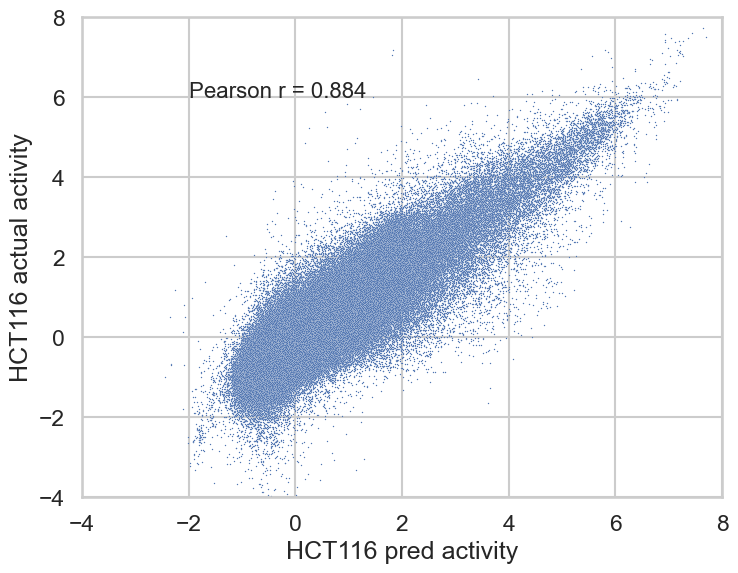

In [17]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

x = MPRA_df['HCT116_pred']
y = MPRA_df['HCT116']
sns.scatterplot(x=x, y=y, s=1)
r = pearson(x, y)[0]
plt.text(-2, 6, f'Pearson r = {r:.3f}', fontsize=16)

plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.xlabel('HCT116 pred activity')
plt.ylabel('HCT116 actual activity')
plt.savefig('figures/Gosai_HCT116_scatter.png', dpi=400)

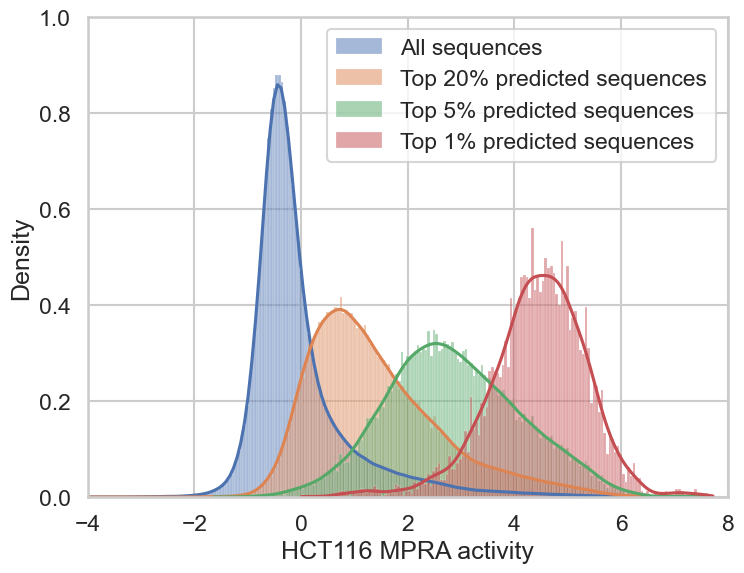

In [20]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HCT116'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116_pred'], 80)
filtered_df = MPRA_df[MPRA_df['HCT116_pred'] > threshold]
sns.histplot(filtered_df['HCT116'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HCT116_pred'] > threshold]
sns.histplot(filtered_df['HCT116'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116_pred'], 99)
filtered_df = MPRA_df[MPRA_df['HCT116_pred'] > threshold]
sns.histplot(filtered_df['HCT116'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)


plt.xlim(-4, 8)
plt.ylim(0, 1)
plt.xlabel('HCT116 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Gosai_MPRA_HCT116_sequence_prioritization.png', dpi=400)

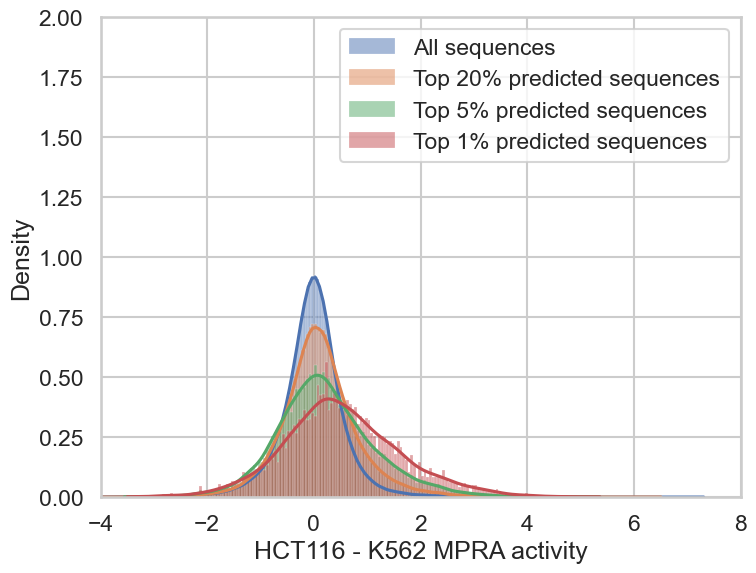

In [21]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HCT116-K562'] = MPRA_df['HCT116'] - MPRA_df['K562']
MPRA_df['HCT116-K562_pred'] = MPRA_df['HCT116_pred'] - MPRA_df['K562_pred']


plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 80)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 99)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)

plt.xlim(-4, 8)
plt.ylim(0, 2)
plt.xlabel('HCT116 - K562 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Gosai_MPRA_HCT116-K562_sequence_prioritization.png', dpi=400)

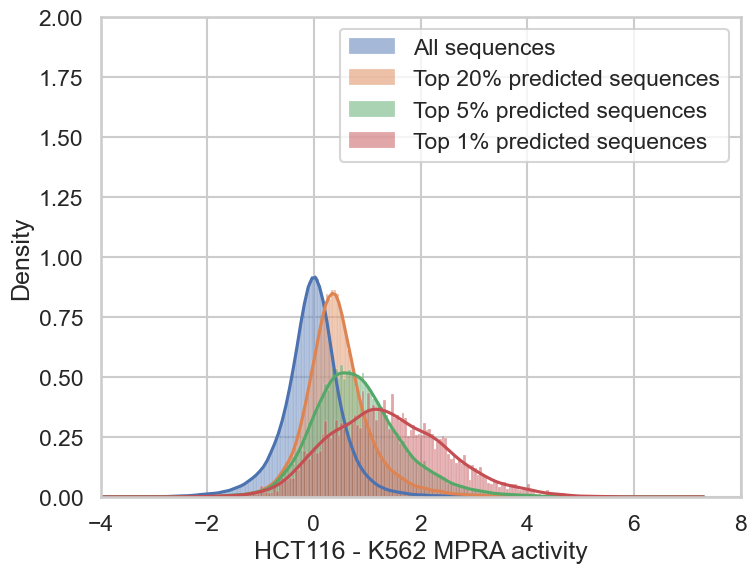

In [22]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HCT116-K562'] = MPRA_df['HCT116'] - MPRA_df['K562']
MPRA_df['HCT116-K562_pred'] = MPRA_df['HCT116_pred'] - MPRA_df['K562']
#######MPRA_df['HCT116-K562_pred'] = MPRA_df['HCT116_pred'] - MPRA_df['K562_pred']
#######这里我应该假设已知K562活性吗？

plt.figure(figsize=(8,6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

sns.histplot(MPRA_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 80)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 95)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences', kde=True)

threshold = np.percentile(MPRA_df['HCT116-K562_pred'], 99)
filtered_df = MPRA_df[MPRA_df['HCT116-K562_pred'] > threshold]
sns.histplot(filtered_df['HCT116-K562'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences', kde=True)

plt.xlim(-4, 8)
plt.ylim(0, 2)
plt.xlabel('HCT116 - K562 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Gosai_MPRA_HCT116-K562_sequence_prioritization.png', dpi=400)

0.2912329242263634


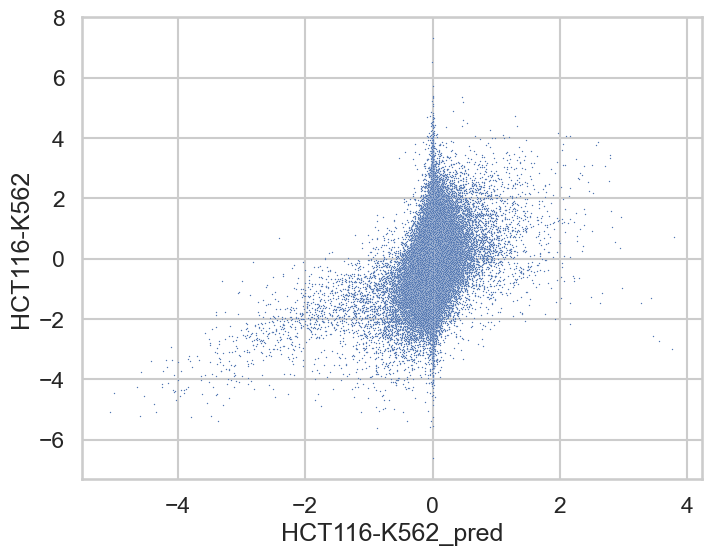

In [41]:
x=MPRA_df['HCT116-K562_pred']
y=MPRA_df['HCT116-K562']
sns.scatterplot(x=x, y=y, s=1)
r, _ = pearson(x, y)
print(r)

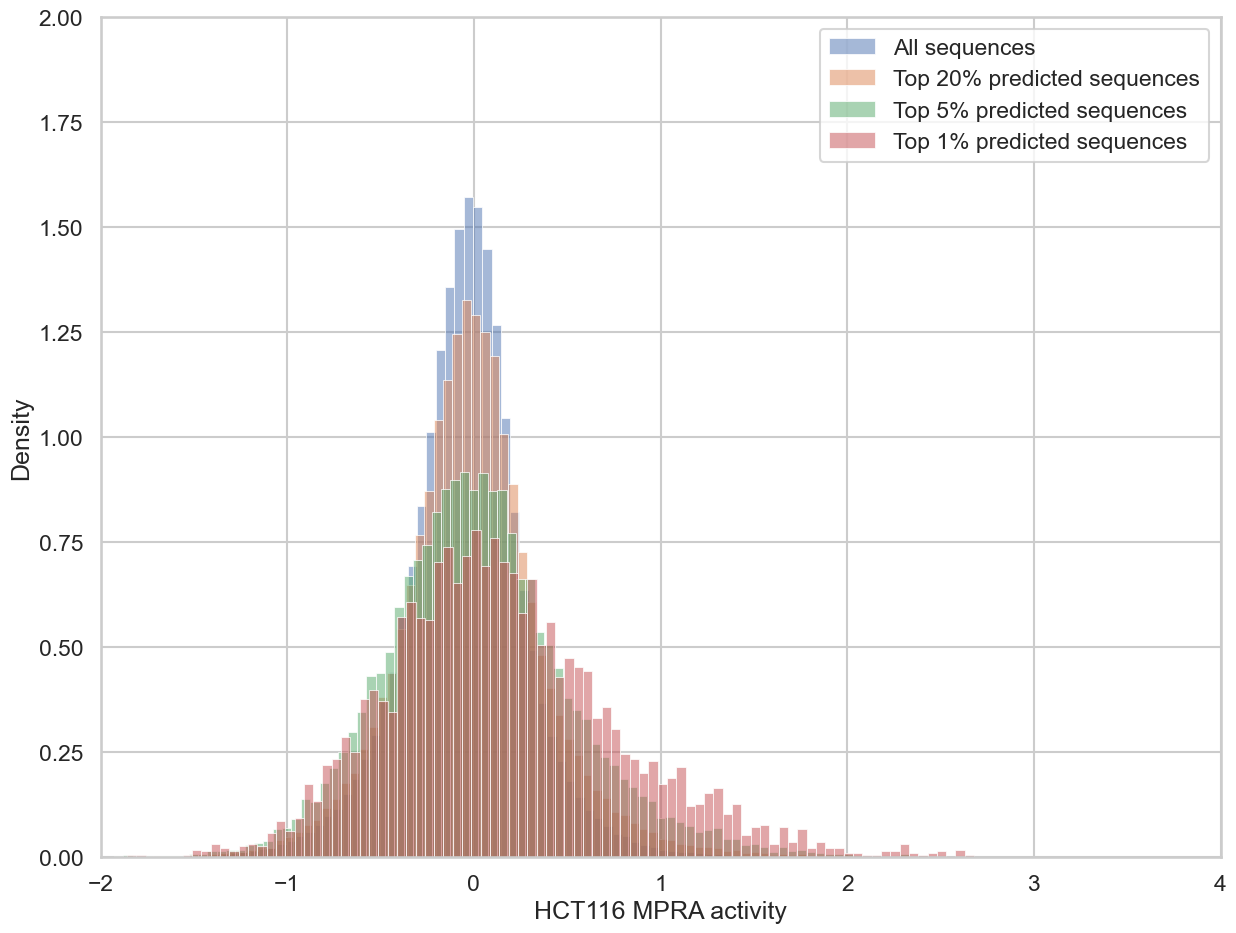

In [39]:
MPRA_df = MPRA_df[MPRA_df['HCT116'].notna()]

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116']
cell_types_pred = [f'{cell}_pred' for cell in cell_types]

MPRA_df['HCT116_deviation'] = MPRA_df['HCT116'] - MPRA_df[cell_types].mean(axis=1)
MPRA_df['HCT116_pred_deviation'] = MPRA_df['HCT116_pred'] - MPRA_df[cell_types_pred].mean(axis=1)


plt.figure(figsize=(16,12), dpi=100)
plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

sns.histplot(MPRA_df['HCT116_deviation'], binwidth=5e-2, stat='density', alpha=0.5, label='All sequences')

threshold = np.percentile(MPRA_df['HCT116_pred_deviation'], 80)
filtered_df = MPRA_df[MPRA_df['HCT116_pred_deviation'] > threshold]
sns.histplot(filtered_df['HCT116_deviation'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 20% predicted sequences')

threshold = np.percentile(MPRA_df['HCT116_pred_deviation'], 95)
filtered_df = MPRA_df[MPRA_df['HCT116_pred_deviation'] > threshold]
sns.histplot(filtered_df['HCT116_deviation'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 5% predicted sequences')

threshold = np.percentile(MPRA_df['HCT116_pred_deviation'], 99)
filtered_df = MPRA_df[MPRA_df['HCT116_pred_deviation'] > threshold]
sns.histplot(filtered_df['HCT116_deviation'], binwidth=5e-2, stat='density', alpha=0.5, label='Top 1% predicted sequences')

plt.xlim(-2, 4)
plt.ylim(0, 2)
plt.xlabel('HCT116 MPRA activity')
plt.ylabel('Density')
plt.legend()
plt.savefig('figures/Gosai_MPRA_HCT116_deviation_sequence_prioritization.png', dpi=400)